In [1]:
# 1 importing pandas as pd 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as matplot
import statsmodels.api as sm

In [2]:
# 2 Read csv file into a pandas dataframe
insurance = pd.read_csv("insurance.csv")

In [3]:
# Take a look at the first few rows
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# 3 a
# dataframe.size 
size = insurance.size 
  
# dataframe.shape 
shape = insurance.shape 
  
# dataframe.ndim 
df_ndim = insurance.ndim 

# series.ndim 
series_ndim = insurance["charges"].ndim 

# printing size and shape 
print("Size = {}\nShape = {}\nShape[0] x Shape[1] = {}". 
format(size, shape, shape[0]*shape[1])) 

# printing ndim 
print("ndim of dataframe = {}\nndim of series = {}". 
format(df_ndim, series_ndim)) 

Size = 9366
Shape = (1338, 7)
Shape[0] x Shape[1] = 9366
ndim of dataframe = 2
ndim of series = 1


In [5]:
# 3 b
# return the dtype of each column
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# We need to get to know about the data types of columns

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# creating bool series True for NaN values  
bool_series = pd.isnull(insurance["age"])  
    
# filtering data  
# displaying data only with age = NaN  
insurance[bool_series]  

,age,sex,bmi,children,smoker,region,charges


In [8]:
# We are checking for Null values

insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# 3 c
# We are looking for duplicated rows 

insurance.duplicated().sum()

1

In [10]:
#Removing duplicated rows

insurance = insurance.drop_duplicates()
insurance.duplicated().sum()

0

In [15]:
df=insurance.copy()

In [17]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#Describe the dataframe to know about it's statistics 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Text(0.5, 1.0, 'Charges Distribution')

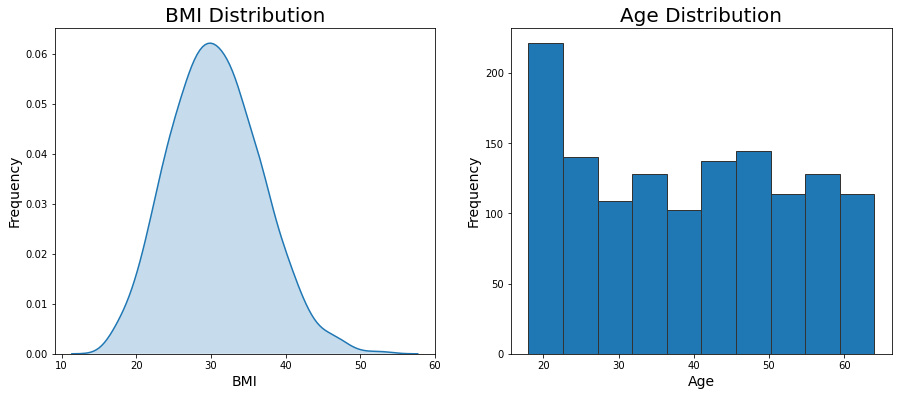

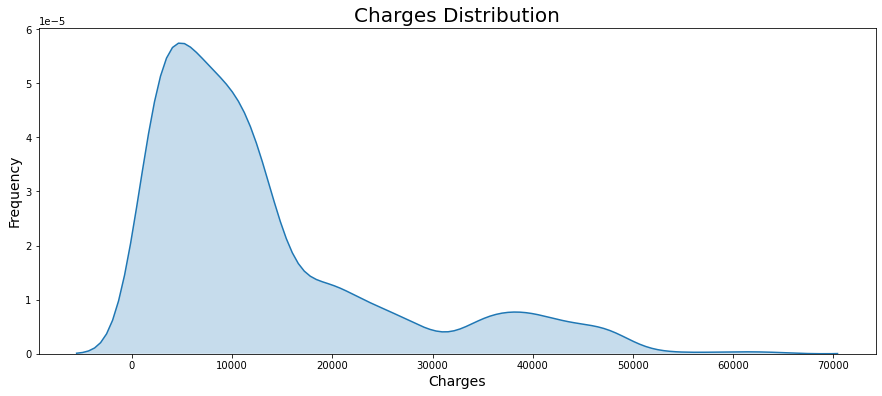

In [18]:
# 3 e
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
df = pd.DataFrame(insurance, columns = ['bmi', 'age', 'charges'] ) 
  
#f, axes = matplot.subplots(3, figsize=(10, 10))

#sns.distplot(df["bmi"], hist=True, rug=True, color="skyblue", ax=axes[0]).set_title('BMI Distribution')
#sns.distplot(df["age"], hist=True, rug=True, color="olive", ax=axes[ 1]).set_title('Age')
#sns.distplot(df["charges"], hist=True, rug=True, color="gold", ax=axes[ 2]).set_title('Charges')

#Prepare subplots with 1 row, 2 columns
fig21, (ax21,ax22) = plt.subplots(1,2)
fig21.set_size_inches(15,6)

#Create a density curve of the BMI distribution
sns.kdeplot(df['bmi'], ax=ax21, shade=True, legend=False)
ax21.set_xlabel("BMI", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("BMI Distribution", fontsize=20)

#Create a histogram of the age distribution
ax22.hist('age', data=df, bins=10, edgecolor='0.2')
ax22.set_xlabel("Age", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Age Distribution", fontsize=20)

#Create a separate subplot for the charges distribution
#This is because this is a more important graph, and is better to take up two columns
fig22, ax23 = plt.subplots()
fig22.set_size_inches(15,6)

#Create density plot of charges distribution
sns.kdeplot(df['charges'], ax=ax23, shade=True, legend=False)
ax23.set_xlabel("Charges", fontsize=14)
ax23.set_ylabel("Frequency", fontsize=14)
ax23.set_title("Charges Distribution", fontsize=20)

# The BMI distribution is bell-shaped and symmetrical
# The Age distribution is mostly uniform, except for ages below 25 where the histogram peaks.
# The charges distribution is skewed to the left.

In [19]:
# 3 f
# skewness along the index axis 
df.skew(axis = 0, skipna = True) 

bmi        0.283914
age        0.054781
charges    1.515391
dtype: float64

In [20]:
# skip the na values 
# find skewness in each row 
df.skew(axis = 1, skipna = True)

0       1.732049
1       1.731548
2       1.732043
3       1.732050
4       1.732047
          ...   
1333    1.732032
1334    1.731813
1335    1.731242
1336    1.732017
1337    1.732044
Length: 1337, dtype: float64

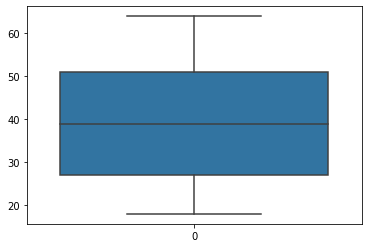

In [50]:
# 3 g
# presence of outliers ‘age’ 
sns.boxplot(data=insurance['age'])
# Not many outliners in age

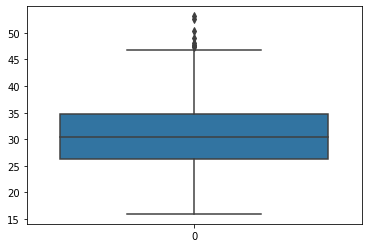

In [51]:
# presence of outliers ‘bmi’ 
sns.boxplot(data=insurance['bmi'])
# As you can see anything above 50 is outliers 

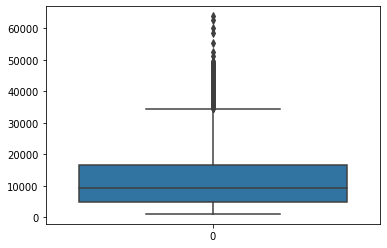

In [53]:
# presence of outliers ‘charges’ 
sns.boxplot(data=insurance['charges'])
# As you can see anything above 35000 is outliers 

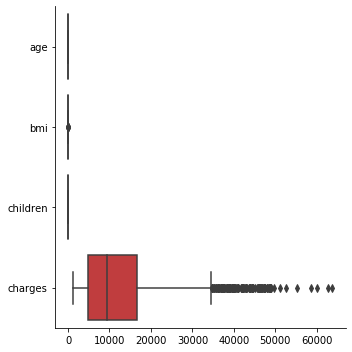

In [57]:
# Distribution of categorical columns
sns.catplot(data=insurance, orient="h", kind="box");

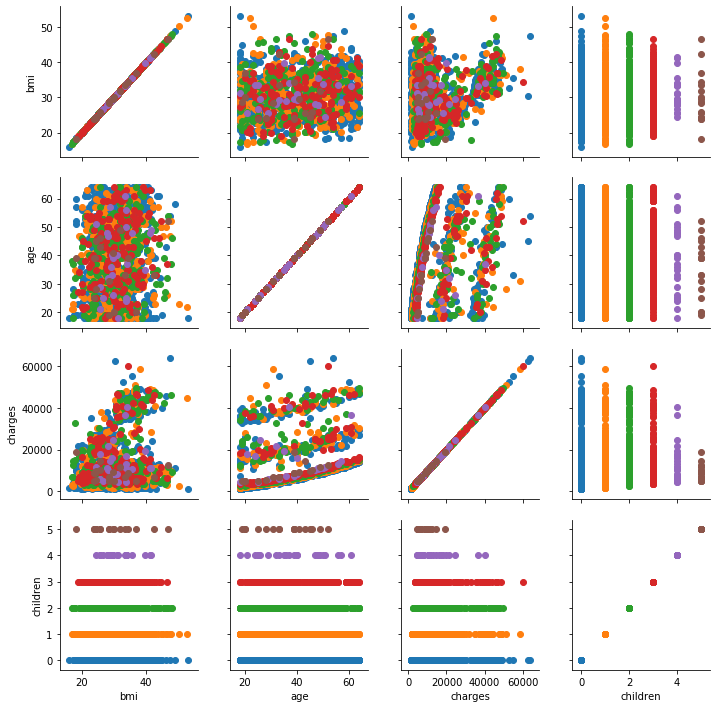

In [268]:
# 3 h
# Distribution of ‘bmi’, ‘age’ and ‘charges’  with children columns.
df = pd.DataFrame(insurance, columns = ['bmi', 'age', 'charges', 'children'] ) 


# Creating a scatter plots for all pairs of variables.  
g = sns.PairGrid(data=df, hue='children')  
g.map(plt.scatter) 

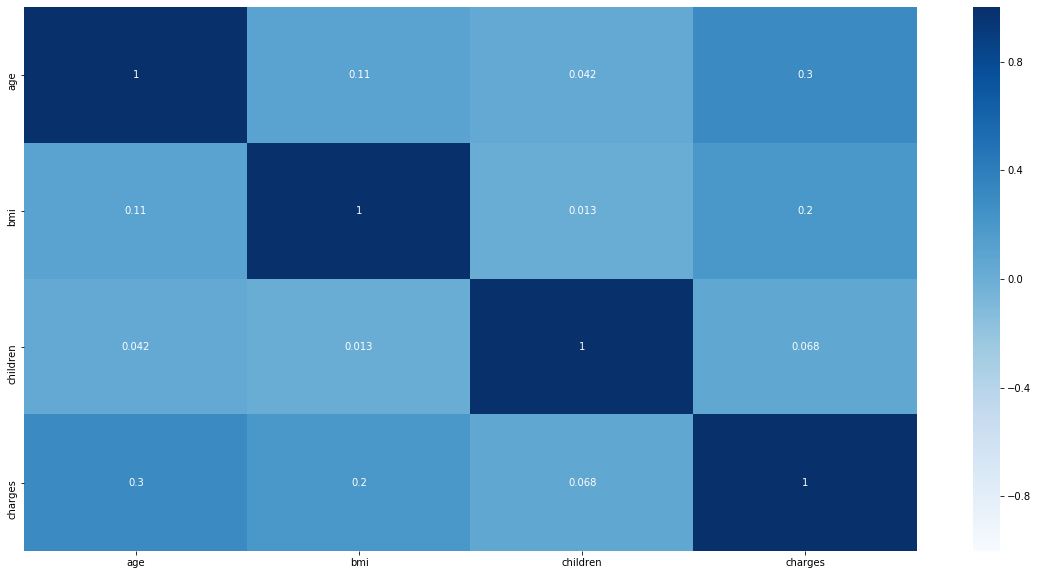

In [269]:
# Checking the Correlation between each columns

corr = insurance.corr()
fig, ax = matplot.subplots(figsize=(20,10)) 
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)

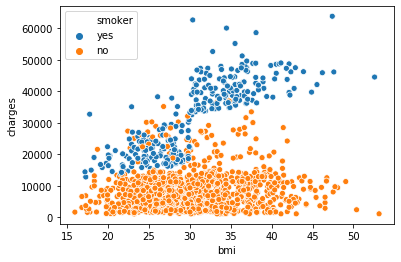

In [249]:
#We use scatterplot so that we can include the smoker column, which has high correlation with expenses 
#and see whether it gives any knowledge on the dataframe 

df = pd.DataFrame(insurance)
sns.scatterplot(x=df["bmi"],y=df["charges"],hue=df["smoker"])

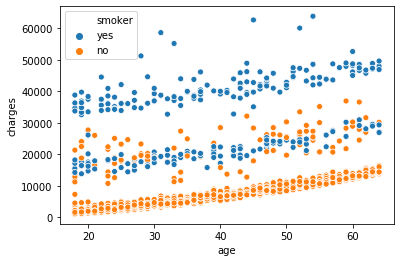

In [250]:
#We can alter the parameters to get a better visual representation

sns.scatterplot(x=df["age"],y=df["charges"],hue=df["smoker"])

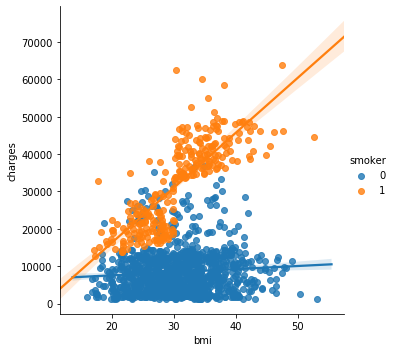

In [81]:
#We will make use of the lmplot to draw two regression lines for the parameters.

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

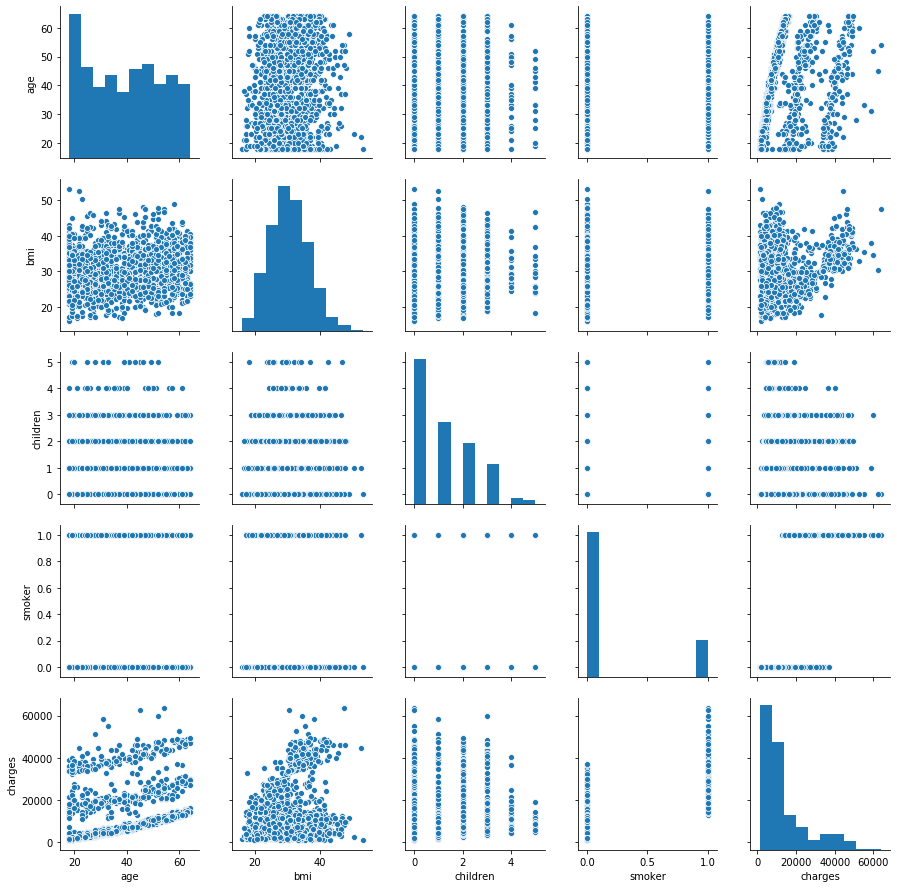

In [89]:
# 3 i
# We are using Pairplot to get a visual representation of complete data distribution

sns.pairplot(data=insurance)

Text(0.5, 1.0, 'Effect of Smoking on Cost')

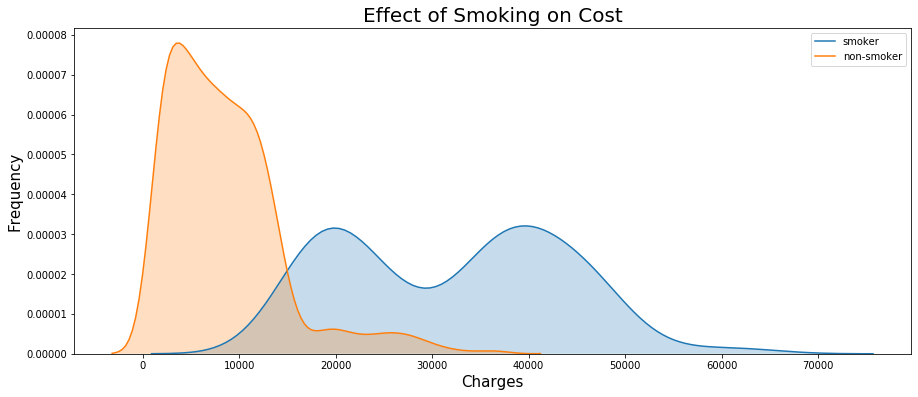

In [170]:
df = pd.DataFrame(insurance, columns = ['charges', 'smoker'] ) 

fig22, ax23 = plt.subplots()
fig22.set_size_inches(15,6)

#Add density curves to subplot ax23 for the charges distribution, one for smokers and one for non-smokers
sns.kdeplot(df.loc[df["smoker"] == 'yes']["charges"], ax=ax23, shade=True, label='smoker')
sns.kdeplot(df.loc[df["smoker"] == 'no']["charges"], ax=ax23, shade=True, label='non-smoker')
ax23.set_ylabel("Frequency", fontsize=15)
ax23.set_xlabel('Charges', fontsize=15)
ax23.set_title("Effect of Smoking on Cost", fontsize=20)

# Smoking makes a significant difference in cost, and hence is an important feature, 
# Smoking influences it very significantly


(274, 32050.23183153285, 11541.547175589121)

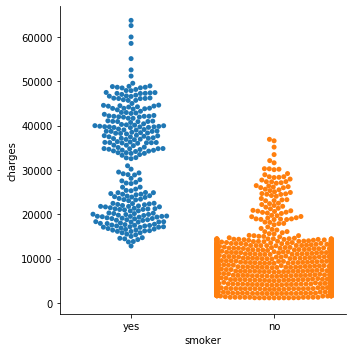

In [176]:
#4 a

df = pd.DataFrame(insurance, columns = ['smoker', 'charges'] ) 
#sns.swarmplot(x=df["sex"],y=df["bmi"])

sns.catplot(x="smoker", y="charges", hue="smoker", kind="swarm", data=df);

smokers = df[df["smoker"] == 'yes']
nonsmokers = df[df["smoker"] == 'no']

n1 = len(smokers)
mu1 = smokers["charges"].mean()
sd1 = smokers["charges"].std()

(n1, mu1, sd1)

# BMI of males does not differ significantly from that of females


In [177]:
smokers = df[df["smoker"] == 'yes']
nonsmokers = df[df["smoker"] == 'no']

n2 = len(nonsmokers)
mu2 = nonsmokers["charges"].mean()
sd2 = nonsmokers["charges"].std()

(n2, mu2, sd2)

(1064, 8434.268297856199, 5993.781819194933)

In [178]:
# μ1−μ2
# Difference in Population Means
sd1 - sd2

# The charges of people who smoke differ significantly from the people who don't as u1-u2 > 0

5547.7653563941885

In [240]:
# 4 b
df = pd.DataFrame(insurance, columns = ['sex', 'bmi' ] ) 


#sns.catplot(x="sex", y="bmi", hue="sex", kind="bar", data=df);

# Identify your population, parameter of interest, construct a null and alternative hypothesis. 
# Pre-determine a p-value threshold. Often it is 0.05 but suit it as per your application
# Parameter of Interest: μ1−μ2, Body Mass Index.
# Null Hypothesis: H0: μ1=μ2 [BMI of Males = BMI of Females]
# Alternative Hypothesis: H1: μ1≠μ2
# If the p-value is less than α, reject the null hypothesis.

females = df[df["sex"] == 'female']
males = df[df["sex"] == 'male']

n1 = len(females)
mu1 = females["bmi"].mean()
sd1 = females["bmi"].std()

(n1, mu1, sd1)

(662, 30.377749244713023, 6.046023085745338)

In [242]:
n2 = len(male)
mu2 = males["bmi"].mean()
sd2 = males["bmi"].std()

(n2, mu2, sd2)

(676, 30.943128698224832, 6.140434615792248)

In [243]:
# μ1−μ2
# Difference in Population Means
sd1 - sd2

-0.09441153004691039

In [244]:
sm.stats.ztest(females["bmi"].dropna(), males["bmi"].dropna(), alternative='two-sided')

# Since the p-value (0.08974343679943912) is greter than 0.05 
# we can reject the Null hypothesis that the mean BMI of males is the same as that of females.

(-1.6967526357522242, 0.08974343679943912)

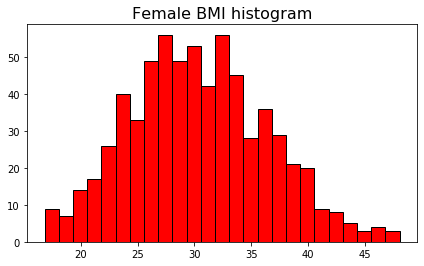

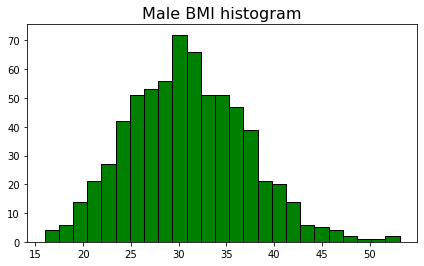

In [245]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["bmi"].dropna(),edgecolor='k',color='red',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["bmi"].dropna(),edgecolor='k',color='green',bins=25)
plt.show()

In [204]:
# 4 c
# The test is applied when you have two categorical variables from a single population. 
# It is used to determine whether there is a significant association between the two variables.
from scipy import stats

df_chi = pd.DataFrame(insurance, columns = ['sex', 'smoker' ] ) 

contingency_table = pd.crosstab(df_chi["sex"],df_chi["smoker"])

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b = stats.chi2_contingency(contingency_table)
b[3]
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

no_of_rows = len(contingency_table.iloc[0:2,0])
no_of_columns = len(contingency_table.iloc[0,0:2])
ddof = (no_of_rows-1) * (no_of_columns-1)
print("Rows:-{} Columns:-{}", no_of_rows, no_of_columns)
print("Degree of Freedom:-", ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("chi-square statistic:-", chi_square_statistic)

critical_value = chi2.ppf(q = 1-alpha, df = ddof)
print('critical_value:', critical_value)

#p-value
p_value = 1-chi2.cdf(x=chi_square_statistic, df=ddof)
print('p-value:', p_value)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0, Proportion of smokers not significantly different in different genders")
else:
    print("Retain H0, Proportion of smokers significantly different in different genders")
    
if p_value<=alpha:
    print("Reject H0, Proportion of smokers not significantly different in different genders")
else:
    print("Retain H0, Proportion of smokers significantly different in different genders")

Observed Values :-
 [[547 115]
 [517 159]]
Expected Values :-
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Rows:-{} Columns:-{} 2 2
Degree of Freedom:- 1
chi-square statistic:- 7.765921028604451
critical_value: 3.841458820694124
p-value: 0.005324114164320548
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 7.765921028604451
critical_value: 3.841458820694124
p-value: 0.005324114164320548
Reject H0, Proportion of smokers not significantly different in different genders
Reject H0, Proportion of smokers not significantly different in different genders


p-value for significance is:  0.7158579926754841
Accept Null hypothesis: bmi across women with no children, one child and two children, are not same


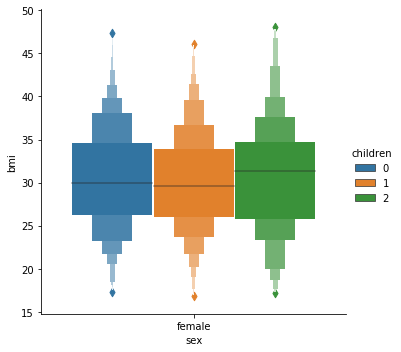

In [237]:
#4 d

# The analysis of variance or ANOVA is a statistical inference test that lets you 
# compare multiple groups at the same time.

# Retrive the 'bmi' 'sex' 'childern' columns where women with no children, one child and two children
df = pd.DataFrame(insurance, columns = ['bmi', 'sex', 'children'] ).query('sex == "female" and children == [0,1,2]')

# create the groups [0,1,2]
grps = pd.unique(df.children.values)

# organize the data based on the groups
d_data = {grp:df['bmi'][df.children == grp] for grp in grps}

F, p = stats.f_oneway(d_data[0], d_data[1], d_data[2])

print("p-value for significance is: ", p)

if p < 0.05:
    print("Reject Null hypothesis: bmi across women with no children, one child and two children, are same")
else:
    print("Accept Null hypothesis: bmi across women with no children, one child and two children, are not same")

    
sns.catplot(x="sex", y="bmi", hue="children", kind="boxen",  data=df)
# as we can see there is very less variation between women with no children, one child and two children
